In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip3 install biopython
from sklearn import cluster, datasets
import numpy as np
import pandas as pd
from numpy import array
from numpy import argmax
from Bio import SeqIO
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
def fasta_frame(fasta_file):
  identifiers = []
  sequences = []
  with open(fasta_file) as f_f:
    for seq_record in SeqIO.parse(f_f, 'fasta'):
        identifiers.append(seq_record.id)
        sequences.append(seq_record.seq.lower())
  s1 = pd.Series(identifiers, name='ID')
  s2 = pd.Series(sequences, name='sequence')
  fasta_frame = pd.DataFrame(dict(ID=s1, sequence=s2))
  return(fasta_frame)
  
def ohe_fun(coluna):
  integer_encoder = LabelEncoder()  
  one_hot_encoder = OneHotEncoder(categories='auto')   
  input_features = []

  for linha in coluna[coluna.columns[1]]:
    integer_encoded = integer_encoder.fit_transform(list(linha))
    integer_encoded = np.array(integer_encoded).reshape(-1, 1)
    one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
    input_features.append(one_hot_encoded.toarray())
  input_features=pad_sequences(input_features, padding='post')
  input_features = np.stack(input_features)
  return(input_features)
  
def flatten_sequence(pred_fasta_flat):
  dimensoes=pred_fasta_flat.shape
  n_samples=dimensoes[0]
  n_x=dimensoes[1]
  n_y=dimensoes[2]
  n_xy=(n_x * n_y)
  pred_fasta_flat=pred_fasta_flat.reshape(n_samples,n_xy)
  return(pred_fasta_flat)

In [0]:
db_te = fasta_frame('159.fasta')
db_te

,ID,sequence
0,M02526:264:000000000-G434J:1:1101:16960:1891,"(c, a, c, t, c, t, t, t, c, c, c, t, a, c, a, ..."
1,M02526:264:000000000-G434J:1:1101:19330:1931,"(t, a, t, t, c, c, c, a, g, t, a, a, g, t, g, ..."
2,M02526:264:000000000-G434J:1:1101:17279:1936,"(c, a, c, t, c, t, t, t, c, c, c, t, c, c, a, ..."
3,M02526:264:000000000-G434J:1:1101:13082:1960,"(a, a, t, t, c, c, g, c, c, a, t, c, a, g, c, ..."
4,M02526:264:000000000-G434J:1:1101:12758:2041,"(a, a, t, t, a, a, g, t, a, g, g, g, a, a, t, ..."
...,...,...
8122,M02526:264:000000000-G434J:1:2104:18740:27588,"(a, a, c, t, c, t, t, t, c, c, c, t, a, c, a, ..."
8123,M02526:264:000000000-G434J:1:2104:13496:27659,"(a, a, t, t, c, a, c, t, g, c, g, c, a, a, t, ..."
8124,M02526:264:000000000-G434J:1:2104:20833:28093,"(c, a, c, t, c, t, t, t, c, c, c, t, a, c, a, ..."
8125,M02526:264:000000000-G434J:1:2104:20027:28392,"(c, a, c, t, c, t, t, t, c, c, c, t, a, c, a, ..."


In [0]:
db_te.to_csv('unsup_df.csv', index=False)

In [0]:
integer_encoder = LabelEncoder()  
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

for coluna, linha in db_te['sequence'].iteritems():
  integer_encoded = integer_encoder.fit_transform(list(linha))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())


In [0]:
for arr in input_features:
  # print(input_features)
  # print(arr.shape)

In [0]:
input_features = pad_sequences(input_features, padding='post')
input_features = np.stack(input_features)

In [0]:
# for arr in input_features:
#   print(arr.shape)

In [0]:
flat_seqs = flatten_sequence(input_features)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(flat_seqs)
    distortions.append(kmeanModel.inertia_)

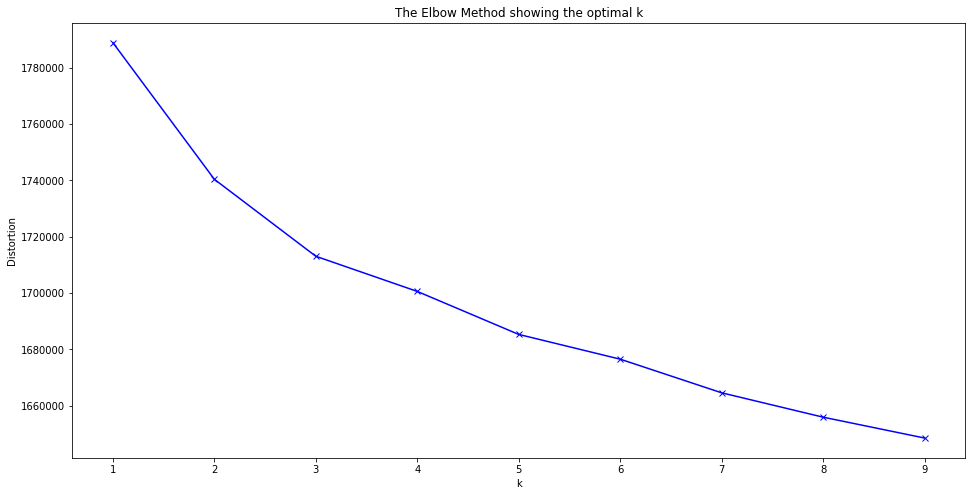

In [0]:
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

No PCA

In [0]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

k_means = cluster.KMeans(n_clusters=5,
                         random_state=13,
                         algorithm='auto',
                         max_iter = 600,
                         verbose=0)
k_means.fit(flat_seqs)
predicted = k_means.predict(flat_seqs)

PCA

In [0]:
import sys
import numpy
from sklearn.decomposition import PCA
numpy.set_printoptions(threshold=sys.maxsize)

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(flat_seqs)

k_means = cluster.KMeans(n_clusters=3,
                         random_state=13,
                         algorithm='auto',
                         max_iter = 1200,
                         verbose=0)
k_means.fit(Y_sklearn)
labels = k_means.predict(Y_sklearn)

In [0]:
pd.set_option('display.max_rows', -1)
labSer=pd.Series(predicted)
db_te['group'] = labSer
columnsTitles = ['ID', 'group', 'sequence']
db_te = db_te.reindex(columns=columnsTitles)
db_te.sample(10)

,ID,group,sequence
2787,M02526:264:000000000-G434J:1:1103:4380:17624,3,"(a, a, t, t, c, g, t, a, c, a, a, t, a, g, a, ..."
8055,M02526:264:000000000-G434J:1:2104:11822:23515,0,"(a, a, t, t, c, c, a, a, g, a, a, a, t, g, c, ..."
2679,M02526:264:000000000-G434J:1:1103:20308:15545,2,"(c, a, c, t, c, t, t, t, c, c, c, t, a, c, a, ..."
4650,M02526:264:000000000-G434J:1:2101:21607:12552,1,"(a, a, t, t, c, c, t, a, c, a, c, a, c, t, g, ..."
5828,M02526:264:000000000-G434J:1:2102:3137:16669,0,"(a, a, t, t, c, a, a, a, a, a, t, g, c, c, t, ..."
6815,M02526:264:000000000-G434J:1:2103:23267:17477,0,"(a, g, c, t, t, t, c, g, c, g, g, t, c, g, c, ..."
5804,M02526:264:000000000-G434J:1:2102:4599:15903,0,"(c, a, c, t, c, t, t, t, c, c, c, t, a, c, a, ..."
1186,M02526:264:000000000-G434J:1:1102:16221:5609,2,"(c, a, c, t, c, t, t, t, c, c, c, t, a, c, a, ..."
3495,M02526:264:000000000-G434J:1:1104:18480:11123,2,"(c, a, c, t, c, t, t, t, c, c, c, t, a, c, a, ..."
8055,M02526:264:000000000-G434J:1:2104:11822:23515,0,"(a, a, t, t, c, c, a, a, g, a, a, a, t, g, c, ..."


In [0]:
db_te.to_csv('clustered_seqs.csv',index=False)

In [0]:
import pickle

pickle.dump(k_means,open("k_means_model.pkl", "wb"))